In [2]:
import numpy
import time
import sys
import os
import save_load_file as slf # https://github.com/ricardodeazambuja/Python-UTILS
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def rot_baxter(theta, alpha):
    cos = numpy.cos
    sin = numpy.sin
    l1 = numpy.array([cos(theta), -sin(theta)*cos(alpha),  sin(theta)*sin(alpha)])
    l2 = numpy.array([sin(theta),  cos(theta)*cos(alpha), -cos(theta)*sin(alpha)])
    l3 = numpy.array([         0,             sin(alpha),             cos(alpha)])
    
    return numpy.vstack([l1,l2,l3])

In [5]:
def baxter_arm(s0=0,s1=0,e0=0,e1=0,w0=0,w1=0,w2=0,gripper=[0,0,147.012]):
    '''
    Returns the endpoint cartesian position
    '''
    # Corrections to match the real BAXTER
    s0=s0+numpy.pi/4
    s1=-s1
    e1=-e1+numpy.pi/2
    w1=-w1
    return  numpy.array([0,0,270.35])+rot_baxter(numpy.pi/2+s0, numpy.pi/2).dot(numpy.array([69,0,0])+\
                                      rot_baxter(numpy.pi/2+s1, numpy.pi/2).dot(numpy.array([0,0,364.35])+\
                                      rot_baxter(0+e0, -numpy.pi/2).dot(numpy.array([-69,0,0])+\
                                      rot_baxter(-numpy.pi/2+e1, numpy.pi/2).dot(numpy.array([0,0,374.29])+\
                                      rot_baxter(0+w0, -numpy.pi/2).dot(numpy.array([-10,0,0])+\
                                      rot_baxter(0+w1, numpy.pi/2).dot(numpy.array([0,0,229.525+gripper[2]])+\
                                      rot_baxter(0+w2, 0).dot(numpy.array([gripper[0],gripper[1],0]))))))))

In [3]:
#
# Controls if the results are saved to a file
#

save2file = True

In [2]:
sim_set = "experiment_0001" # basically is the name of the folder where the data is read/saved
base_dir = "simulation_data_00003"

In [26]:
# %%time

# number_of_trials = 100

# # for percentage_of_decimated_connections in [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]:
# #     extra_name = "_Monolithic_decIntConn_"+str(percentage_of_decimated_connections)+"_"
# #     extra_name = "_Modular_decIntConn_"+str(percentage_of_decimated_connections)+"_"
    
    
# # for number_of_decimated_columns in range(5):
# #     extra_name = "_Monolithic_decColumns_"+str(number_of_decimated_columns)+"_"
# #     extra_name = "_Modular_decColumns_"+str(number_of_decimated_columns)+"_"


# # for decimated_neurons in numpy.arange(11)*6:
# #     extra_name = "_Monolithic_decNeurons_" + str(decimated_neurons) + "_"
# #     extra_name = "_Modular_decNeurons_" + str(decimated_neurons) + "_"

# for decimated_neurons in numpy.arange(11)*6*5:
#     extra_name = "_Monolithic_decNeurons_ind_col_" + str(decimated_neurons) + "_"
# #     extra_name = "_Modular_decNeurons_ind_col_" + str(decimated_neurons) + "_"

#     simulation_type = "parallel"

#     lsm_i = "ALL"

#     trials_range = range(number_of_trials)

#     for trial_number in trials_range:    
#             filename = "./"+base_dir+"/"+sim_set+"/joint_angles_mean_"+simulation_type+"_"+str(lsm_i)+"_"+str(trial_number)+extra_name+"_LSM.npy"
#             joint_angles_mean = numpy.load(filename)

#             xyz_pos = []
#             for s0, s1, e1, w1 in joint_angles_mean:
#                 xyz_pos.append((baxter_arm(s0=s0,s1=s1,e1=e1,w1=w1)+numpy.array([-0.2591,-0.1362,1.054])*1E3)/1000)

#             filename = "./"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_"+simulation_type+"_"+str(lsm_i)+"_"+str(trial_number)+extra_name+"_VREP.npy"
#             if save2file:
#                 numpy.save(filename,xyz_pos)

# xyz_pos = numpy.array(xyz_pos)

CPU times: user 6min, sys: 1.56 s, total: 6min 1s
Wall time: 6min 4s


# Loads the values from files:

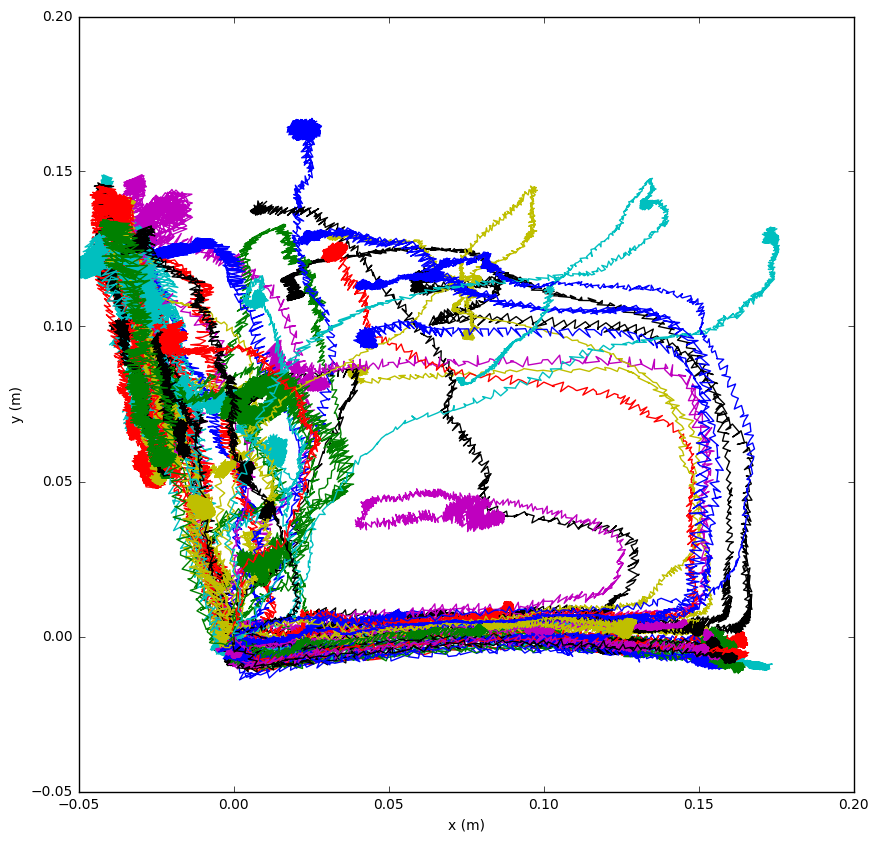

In [18]:
# it's for each column!!!
# percentage_of_decimated_connections = 0.075 # [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]
# extra_name = "_Monolithic_decIntConn_"+str(percentage_of_decimated_connections)+"_"
# extra_name = "_Modular_decIntConn_"+str(percentage_of_decimated_connections)+"_"

# number_of_decimated_columns = 4 # [0, 1, 2, 3, 4]
# extra_name = "_Monolithic_decColumns_"+str(number_of_decimated_columns)+"_"
# extra_name = "_Modular_decColumns_"+str(number_of_decimated_columns)+"_"

# it's for each column!!!
# decimated_neurons = 6 # [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
# extra_name = "_Monolithic_decNeurons_" + str(decimated_neurons) + "_"
# extra_name = "_Modular_decNeurons_" + str(decimated_neurons) + "_"

# the decimated neurons are located in only one column (a randomly chosen one)
decimated_neurons = 270 #[  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300]
extra_name = "_Monolithic_decNeurons_ind_col_" + str(decimated_neurons) + "_"
# extra_name = "_Modular_decNeurons_ind_col_" + str(decimated_neurons) + "_"


number_of_trials = 100

# simulation_type = "parallel"

# lsm_i = "ALL"

params = {'legend.fontsize': 10,
          'figure.figsize': (15, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)

plt.figure(figsize =(10,10))


for trial_number in range(number_of_trials):

    filename = "./"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_parallel_ALL_"+str(trial_number)+extra_name+"_VREP.npy"
    xyz_pos = numpy.load(filename)

    plt.plot(xyz_pos[:,0]-xyz_pos[0,0],xyz_pos[:,1]-xyz_pos[0,1])
    
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim([-0.05,0.2])
plt.ylim([-0.05,0.2])
# plt.title("Cartesian Movement Generated by Baxter - "+extra_name)


plt.axes().set_aspect('equal', 'datalim')

plt.savefig("Results"+extra_name+'.png', bbox_inches='tight',pad_inches=1, dpi=300)

plt.show()


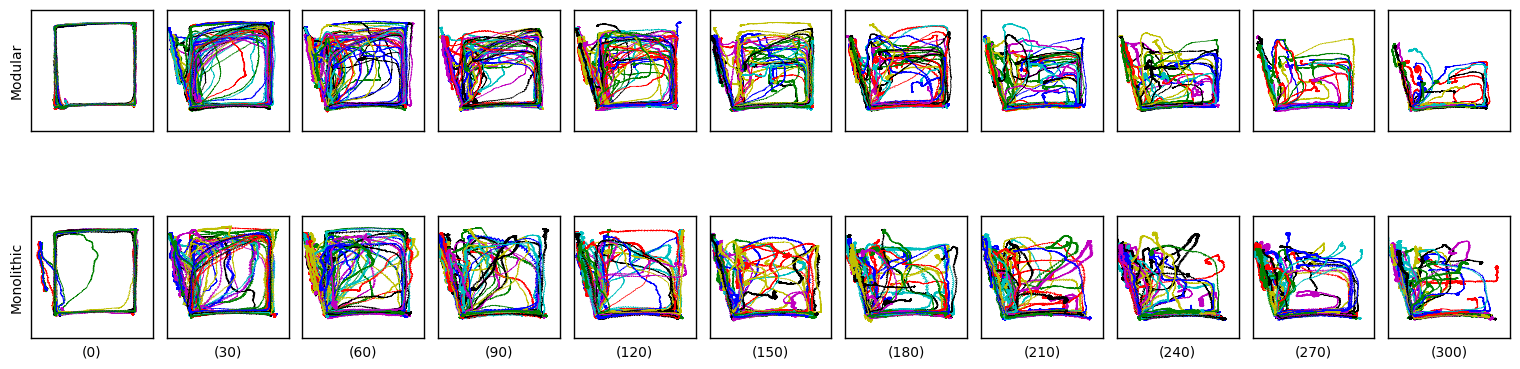

In [4]:

# the decimated neurons are located in only one column (a randomly chosen one)
decimated_neurons = [  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300]


number_of_trials = 100

# simulation_type = "parallel"

# lsm_i = "ALL"

params = {'legend.fontsize': 10,
          'figure.figsize': (15, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params)


for di,dn in enumerate(decimated_neurons):
    
    for _extra_name,diextra in zip(["Modular","Monolithic"],[0,len(decimated_neurons)]):
    
        plt.subplot(2,len(decimated_neurons),di+1+diextra)
        extra_name = "_"+_extra_name+"_decNeurons_ind_col_" + str(dn) + "_"

        for trial_number in range(number_of_trials):

            filename = "./"+base_dir+"/"+sim_set+"/baxter_xyz_joint_angles_mean_parallel_ALL_"+str(trial_number)+extra_name+"_VREP.npy"
            xyz_pos = numpy.load(filename)

            plt.plot(xyz_pos[:,0]-xyz_pos[0,0],xyz_pos[:,1]-xyz_pos[0,1], linewidth=0.5)

        if diextra:
            plt.xlabel("("+str(dn)+")")
            
        if di==0:
            plt.ylabel(_extra_name)
            
        plt.xlim([-0.05,0.2])
        plt.ylim([-0.05,0.2])
        plt.gca().set_aspect(1)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        
plt.tight_layout(pad=0, h_pad=0, w_pad=1, rect=None)
plt.savefig("Row_Results"+extra_name+'.png', bbox_inches='tight',pad_inches=1, dpi=300)

plt.show()